## Project 4:  Solving N-Queens Problem using Genetic Algorithms

#### CSC 180  Intelligent Systems

#### Dr. Haiquan Chen, California State University, Sacramento


In [12]:
#NAME: Rojan Maharjan
#ID: 301855982
#Course Title: CSC180
#Assignment ID: Project 4
#Due date: Nov 18 by 10 AM




## Part I: Position-index-based board representation

In [1]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


In [2]:
def create_individual():
    return random.sample(range(64), 8)

In [3]:
print(create_individual())

[12, 16, 32, 34, 10, 30, 5, 62]


In [4]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [5]:
s = create_individual()
show_grid(s)

-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
X|X|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|X|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
X|-|-|-|-|X|-|-|
----------------


In [6]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:
pop = toolbox.population(n=5)

print(pop[0])

[42, 22, 16, 20, 8, 59, 43, 2]


In [8]:
show_grid(pop[0])

-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
X|-|-|-|X|-|X|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|X|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which returns the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board.   ***Give each duplicate a high penalty (i.e., multiply by 20, 50) and add the penalty to the fitness value.*** 

-  evaFitness() returns the total number of duplicate position pair (with penalty) plus the total number of distinct pairs of queens that attack each other.  

In [29]:

    
    

def temp(chromosome):
    clashes = 0
    row_col_clashes = abs(len(chromosome) - len(np.unique(chromosome)))
    clashes += row_col_clashes

    # calculate diagonal clashes
    for i in range(len(chromosome)):
        for j in range(len(chromosome)):
            if ( i != j):
                dx = abs(i-j) 
                dy = abs(chromosome[i] - chromosome[j])
                if(dx == dy):
                    clashes += 1
    return clashes

In [16]:

# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
    dup = 0
    ##Give each duplicate a high penalty (i.e., multiply by 20, 50)
    penalty = 40
    s =[]
    for i in individual:
        if i not in s:
            s.append(i)
        else:
            dup = dup+1

    dup = dup * penalty
    return dup
    
#fitness function

def evaFitness(individual):
    
    conflict = 0
    dimension = len(individual)
    
    for x in range (len(individual)):
        x_row, x_column = individual[x] // dimension, individual[x] % dimension
        for y in range (x+1,len(individual)):
            y_row , y_column = individual[y] //dimension, individual[y] % dimension
            if x_row == y_row or x_column == y_column or abs(x_row - y_row)== abs(x_column-y_column):
                conflict +=1
    dup = checkDuplicate(individual)        
    return (dup + conflict,)
    

    

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [17]:

toolbox.register("evaluate",evaFitness)






In [18]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [19]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [20]:
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max",np.max)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [21]:

generations = 100
population_size = toolbox.population(n=100)
crossover_prob = 0.5
mutation_prob = 0.5
hof = tools.HallOfFame(1)   ## create a hall of fame which stores only the best individual

_ , log1 =algorithms.eaSimple(population_size,toolbox,crossover_prob,mutation_prob,generations,stats=stats,halloffame=hof,verbose=False)


In [29]:
generations = 100
population_size2 = toolbox.population(n=2500)
hof2 = tools.HallOfFame(1)

_ , log2 = algorithms.eaSimple(population_size2,toolbox,crossover_prob,mutation_prob,generations,stats=stats,halloffame=hof2,verbose=False)


In [30]:

print(f"Best Individual for population size 100 and generations {generations} is: {hof[0]}") 
print(f"Best Individual for population size 500 and generations {generations} is: {hof2}")

Best Individual for population size 100 and generations 100 is: [36, 2, 46, 17, 13, 56, 31, 51]
Best Individual for population size 500 and generations 100 is: [[29, 42, 52, 62, 23, 32, 9, 3]]


### 5 pts:  Plot the "avg" and "min" for each generation

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline  
def plot_generations(generation, average, minimum, maximum):
    plt.figure(figsize=(8, 8))
    plt.grid(True)
    plt.plot(generation, average, label="average")
    plt.plot(generation, minimum, label="minimum")
    plt.plot(generation, maximum, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.ylim(-1)
    plt.legend(loc="upper right")
    plt.show()

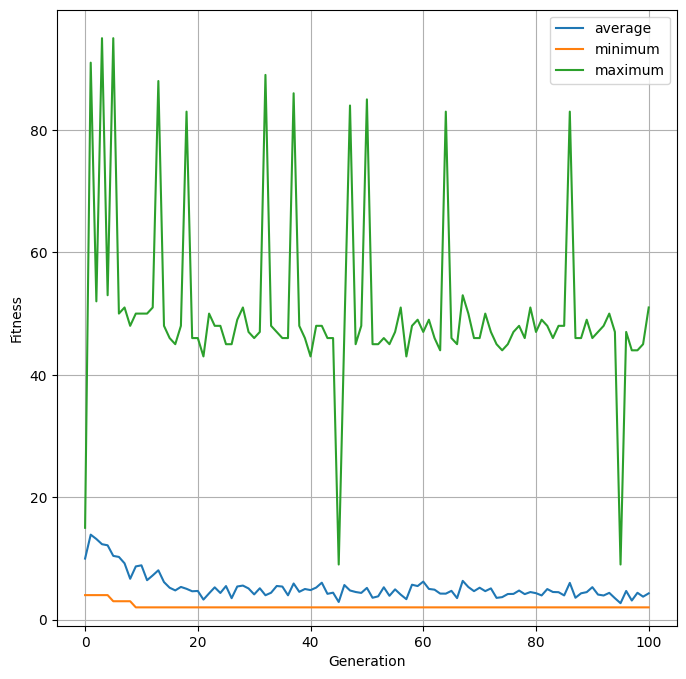

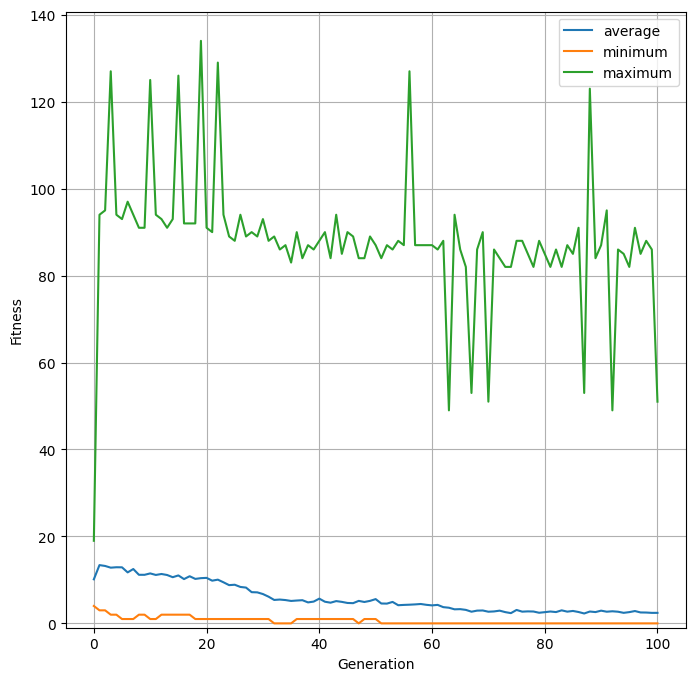

In [32]:
plot_generations(*log1.select("gen","avg","min","max"))
plot_generations(*log2.select("gen","avg","min","max"))

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [35]:
print(f"The Best Individual is : {hof2[0]}  with Fitness value {evaFitness(hof2[0])}")
print("As a chess board")
show_grid(hof2[0])


The Best Individual is : [29, 42, 52, 62, 23, 32, 9, 3]  with Fitness value (0,)
As a chess board
-|-|-|X|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|X|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------


## The Best individual
![best](best_individual.png)

## Part II: Row-index-based board representation

In [38]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


c:\Users\Rojan\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Rojan\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [39]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [40]:
toolbox.individual()

[5, 1, 4, 7, 5, 3, 2, 6]

In [41]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [42]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [43]:
pop = toolbox.population(n=5)

print(pop[0])

[3, 3, 4, 6, 7, 0, 4, 7]


In [44]:
show_grid(pop[0])

-|-|-|X|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|-|X|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [45]:
#fitness function
def evaFitness(individual):
    
    conflict = 0
    row_col_clashes = abs(len(individual) - len(np.unique(individual)))
    conflict += row_col_clashes

    # calculate diagonal clashes
    for i in range(len(individual)):
        for j in range(i,len(individual)):
            if ( i != j):
                dx = abs(i-j)
                dy = abs(individual[i] - individual[j])
                if(dx == dy):
                    conflict += 1


    return (conflict,)



### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [46]:
toolbox.register("evaluate",evaFitness)


In [47]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)



In [48]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max",np.max)



### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [49]:
generations = 100
population_size = toolbox.population(n=2500)
crossover_prob = 0.5
mutation_prob = 0.5
hof = tools.HallOfFame(1)   ## create a hall of fame which stores only the best individual

_ , log =algorithms.eaSimple(population_size,toolbox,crossover_prob,mutation_prob,generations,stats=stats,halloffame=hof,verbose=False)




### 5 pts:  Plot the "avg" and "min" for each generation

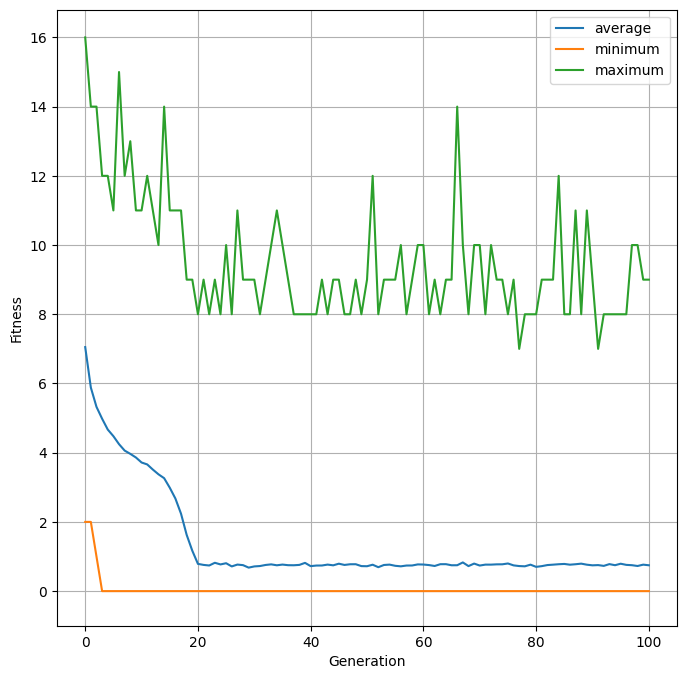

In [50]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

plot_generations(*log.select("gen","avg","min","max"))








### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [51]:

print(f"The Best Individual is {hof[0]} with fitness value {evaFitness(hof[0])}")
show_grid(hof[0])


The Best Individual is [5, 2, 0, 6, 4, 7, 1, 3] with fitness value (0,)
-|-|-|-|-|X|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------


## The Best Individual for Row - indexed based is 
![berst](best_individual2.png)

### Reflection:  Which board representaion is better in terms of ease of coding and final solution quality?   Try different parameter values for mutation and crossover and vary the number of generations and the population size.  Write your findings in the report.        

In [57]:
def plot_generations(generation, average, minimum, maximum,title):
    plt.figure(figsize=(8, 8))
    plt.grid(True)
    plt.plot(generation, average, label="average")
    plt.plot(generation, minimum, label="minimum")
    plt.plot(generation, maximum, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.ylim(-1)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

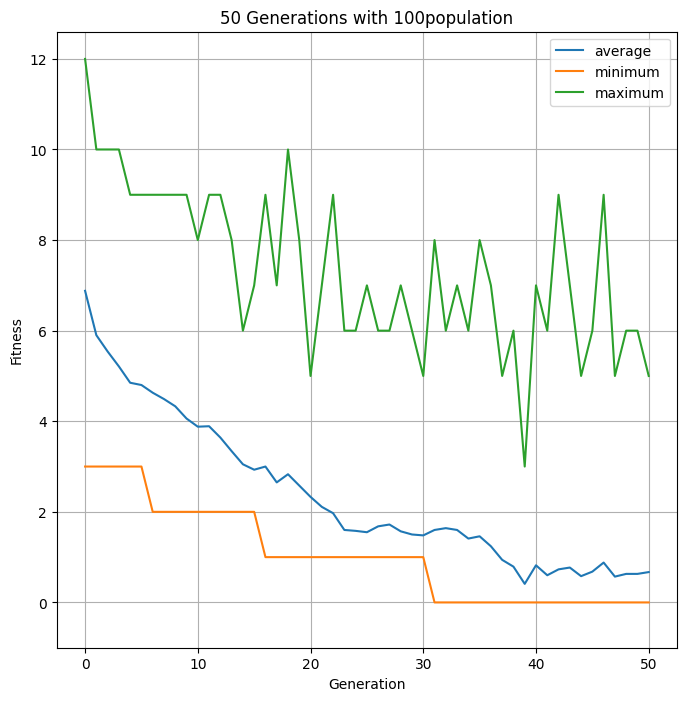

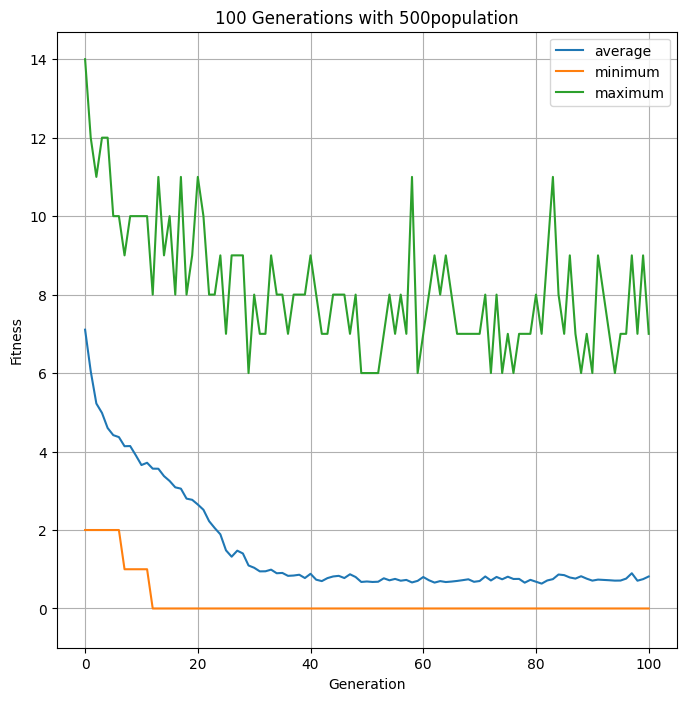

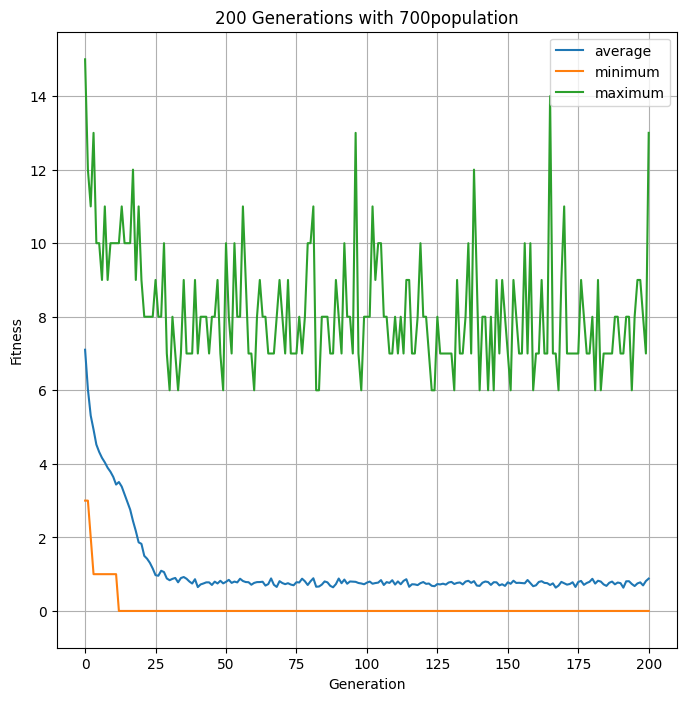

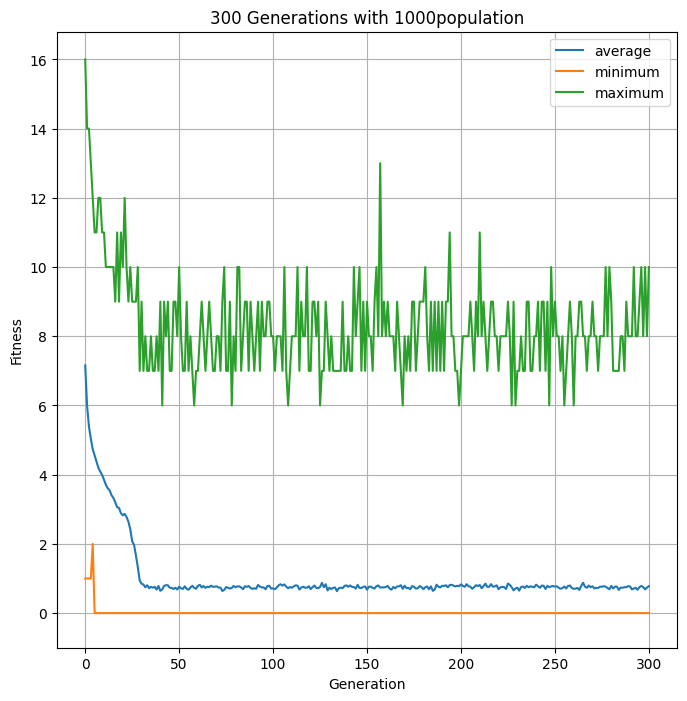

In [58]:
generations = [50,100,200,300]
pops = [100,500,700,1000]

for i in range(len(generations)):
    
    hof = tools.HallOfFame(1)
    population_size = toolbox.population(n = pops[i])
    gen = generations[i]
    _ , log = algorithms.eaSimple(population_size,toolbox,crossover_prob,mutation_prob,gen,stats=stats,halloffame=hof,verbose=False)
    title = str(gen) + " Generations with "+ str(pops[i]) + "population"
    plot_generations(*log.select("gen","avg","min","max"),title=title)


